In [55]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [56]:
observation = 1000
xs = np.random.uniform(-10,10,(observation,1))
zs = np.random.uniform(-10,10,(observation,1))

In [57]:
print(xs.shape)
print(zs.shape)

(1000, 1)
(1000, 1)


In [58]:
print(zs)

[[-4.41855745e+00]
 [-7.95839468e+00]
 [-2.65795509e+00]
 [-8.68490288e+00]
 [ 8.30846334e+00]
 [ 8.14173491e+00]
 [ 6.54852875e-01]
 [ 6.40768423e+00]
 [ 7.10906376e+00]
 [-5.69406340e+00]
 [ 1.81958613e+00]
 [-5.95472188e+00]
 [-5.40249602e+00]
 [-8.75559060e+00]
 [-9.43253759e+00]
 [-9.53628861e+00]
 [-2.51218712e+00]
 [-9.31831081e-01]
 [-5.32909720e+00]
 [ 1.20525400e-01]
 [ 4.01221353e+00]
 [-2.48757683e+00]
 [ 9.91025460e+00]
 [-9.15944602e-01]
 [-4.08001466e+00]
 [ 1.73376178e+00]
 [-9.07949712e+00]
 [ 7.65734151e+00]
 [ 8.30963328e+00]
 [-3.40250252e+00]
 [-1.81828457e+00]
 [-4.39055926e+00]
 [ 1.12374977e+00]
 [-7.41041643e+00]
 [ 1.65803085e+00]
 [ 8.61992669e+00]
 [-3.20189150e+00]
 [-3.05727472e+00]
 [ 8.02640163e+00]
 [ 1.79017047e+00]
 [ 3.56591806e+00]
 [ 1.95116963e+00]
 [-9.17549783e+00]
 [ 6.42149385e+00]
 [ 1.24610697e+00]
 [-3.66435939e+00]
 [ 5.24078550e+00]
 [ 5.03267679e+00]
 [ 4.58837241e+00]
 [-7.26589224e-01]
 [-9.63677975e+00]
 [ 7.08099014e+00]
 [ 5.7912964

In [59]:
inputs = np.column_stack((xs,zs))

In [60]:
print(inputs.shape)

(1000, 2)


In [61]:
inputs

array([[ 0.46308713, -4.41855745],
       [ 5.0209098 , -7.95839468],
       [-6.13455086, -2.65795509],
       ...,
       [-8.94513809,  8.54191092],
       [ 3.82243187,  2.92967093],
       [ 1.7792202 ,  5.94625574]])

In [62]:
noise = np.random.uniform(-1, 1, (observation,1))
# Produce the targets according to the f(x,z) = 2x - 3z + 5 + noise definition.
# In this way, we are basically saying: the weights should be 2 and -3, while the bias is 5.
targets = 2*xs - 3*zs + 5 + noise

In [63]:
targets.shape

(1000, 1)

In [64]:
init_range = 0.1
weights = np.random.uniform(-init_range,init_range,size=(2,1))
bias = np.random.uniform(-init_range,init_range,size=1)
weights

array([[-0.07235621],
       [-0.0917505 ]])

In [65]:
learning_date = 0.001

In [66]:
loss = []
for i in range(100000):
    outputs           = np.dot(inputs,weights) + bias
    deltas            = outputs - targets
    l2_norm_loss      = np.sum(deltas **2) / 2 /observation
    
    deltas_scaled     = deltas/observation
    weights           = weights - learning_date * np.dot(inputs.T,deltas_scaled)
    bias              = bias - learning_date* np.sum(deltas_scaled)
    if i%100==0:
        print("[*] LOSS : {}".format(l2_norm_loss))
    loss.append(l2_norm_loss)
        
    

[*] LOSS : 242.55737188808277
[*] LOSS : 10.112031923778616
[*] LOSS : 8.16449311099173
[*] LOSS : 6.719576653608028
[*] LOSS : 5.535490477477662
[*] LOSS : 4.5650265510479
[*] LOSS : 3.7696448934904403
[*] LOSS : 3.117758755114399
[*] LOSS : 2.5834799804287907
[*] LOSS : 2.1455909193257767
[*] LOSS : 1.7867018170092794
[*] LOSS : 1.492560219963903
[*] LOSS : 1.2514849726132407
[*] LOSS : 1.053902327149407
[*] LOSS : 0.8919657442048243
[*] LOSS : 0.7592442856262759
[*] LOSS : 0.6504672245884647
[*] LOSS : 0.5613147308263507
[*] LOSS : 0.4882463185326766
[*] LOSS : 0.42836024412443857
[*] LOSS : 0.37927827018452664
[*] LOSS : 0.33905121924416337
[*] LOSS : 0.3060815666923035
[*] LOSS : 0.27905999876772775
[*] LOSS : 0.25691341618078967
[*] LOSS : 0.23876231844844412
[*] LOSS : 0.22388587655968972
[*] LOSS : 0.2116933069127798
[*] LOSS : 0.20170040970614814
[*] LOSS : 0.19351034005929457
[*] LOSS : 0.18679784823302084
[*] LOSS : 0.18129636308568675
[*] LOSS : 0.17678740581472652
[*] LOSS

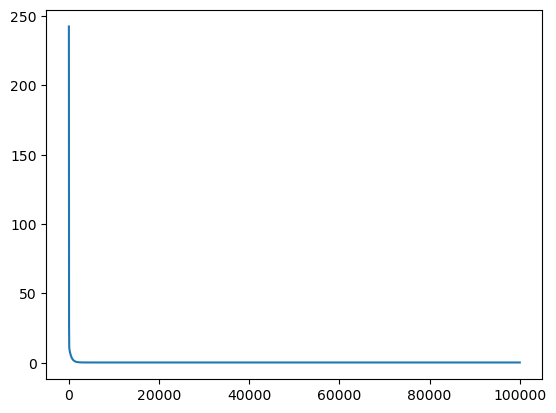

In [67]:
plt.plot(range(100000),loss)